In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
from scipy.spatial import cKDTree
from math import *
np.random.seed(123)
import urllib.request
import urllib, os

In [2]:
import pandas as pd
import xarray as xr
import math
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

In [3]:
import numpy as np
import xarray as xr
import xesmf as xe

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [18]:
ds = xr.open_dataset(r'/home/shubham/ugp/cleaned/Land_and_sea_temp_1850-2022.nc')

In [19]:
ds= ds['temperature'][1826:-2][:][:]
ds

<xarray.DataArray 'temperature' (time: 236, latitude: 180, longitude: 360)>
[15292800 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) datetime64[ns] 2002-04-01 2002-05-01 ... 2021-11-01
Attributes:
    units:          degree C
    standard_name:  surface_temperature_anomaly
    long_name:      Air Surface Temperature Anomaly
    valid_min:      -20.13358547046764
    valid_max:      25.779894588495726

In [20]:
month_length = ds.time.dt.days_in_month
month_length

<xarray.DataArray 'days_in_month' (time: 236)>
array([30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31,
       30, 31, 30, 31, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31,
       28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30,
       31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30,
       31, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30,
       31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30,
       31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 29,
       31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31,
       31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31,
       31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 29, 31, 30, 31,
       30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31,
       30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31,
       30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 29, 31, 30, 31, 30, 31, 31,
       30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30])
Coordinates:
  * time     (time) datetime64[ns] 2002-04-01 2002-05-01 ... 2021-11-01

In [21]:
ds = ds.drop(['land_mask', 'climatology'])
ds

ValueError: One or more of the specified variables cannot be found in this dataset

In [22]:
# Calculate the weights by grouping by 'time.season'.
weights = (
    month_length.groupby("time.season") / month_length.groupby("time.season").sum()
)

# Test that the sum of the weights for each season is 1.0
np.testing.assert_allclose(weights.groupby("time.season").sum().values, np.ones(4))

# Calculate the weighted average
ds_weighted = (ds * weights).groupby("time.season").sum(dim="time")

In [23]:
ds_weighted

<xarray.DataArray (season: 4, latitude: 180, longitude: 360)>
array([[[1.39690999, 1.39692049, 1.39693836, ..., 1.3969226 ,
         1.39691105, 1.39690684],
        [1.34421591, 1.34418337, 1.34417569, ..., 1.34446181,
         1.34435524, 1.34427325],
        [1.28954994, 1.28935532, 1.28920408, ..., 1.29038756,
         1.29006673, 1.2897873 ],
        ...,
        [3.36462111, 3.36214158, 3.35960958, ..., 3.37131292,
         3.3691236 , 3.36694745],
        [3.33083068, 3.32920038, 3.32755219, ..., 3.33525044,
         3.33382051, 3.33237031],
        [3.28598676, 3.28551399, 3.28502721, ..., 3.28721309,
         3.28682556, 3.28642358]],

       [[0.67456263, 0.67525444, 0.67595426, ..., 0.67253679,
         0.67320364, 0.67387896],
        [0.61923092, 0.62098982, 0.62277431, ..., 0.61410893,
         0.61579035, 0.61749771],
        [0.56457761, 0.56705815, 0.56957782, ..., 0.55736924,
         0.55973328, 0.56213604],
...
        [2.67461635, 2.67114138, 2.66763237, ..., 2.69273607,
         2.68179361, 2.67816563],
        [2.65155753, 2.64914126, 2.64705384, ..., 2.66448992,
         2.655579  , 2.65358127],
        [2.63152616, 2.62787024, 2.62372369, ..., 2.63739298,
         2.63280808, 2.63216005]],

       [[1.2997131 , 1.2998166 , 1.29991318, ..., 1.29936121,
         1.29948535, 1.29960268],
        [1.34401908, 1.34426717, 1.34449526, ..., 1.34315456,
         1.34346277, 1.34375093],
        [1.39071783, 1.39095099, 1.39114412, ..., 1.3897696 ,
         1.39012793, 1.39044373],
        ...,
        [2.54051981, 2.53956255, 2.54034445, ..., 2.54365777,
         2.54291946, 2.54181765],
        [2.4877257 , 2.48709935, 2.4875647 , ..., 2.4869735 ,
         2.48714516, 2.48688463],
        [2.42138136, 2.421117  , 2.4226297 , ..., 2.41944474,
         2.41993173, 2.42041154]]])
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [24]:
# only used for comparisons
ds_unweighted = ds.groupby("time.season").mean("time")
ds_diff = ds_weighted - ds_unweighted

Text(0.5, 1.02, 'Sea surface height (m)')

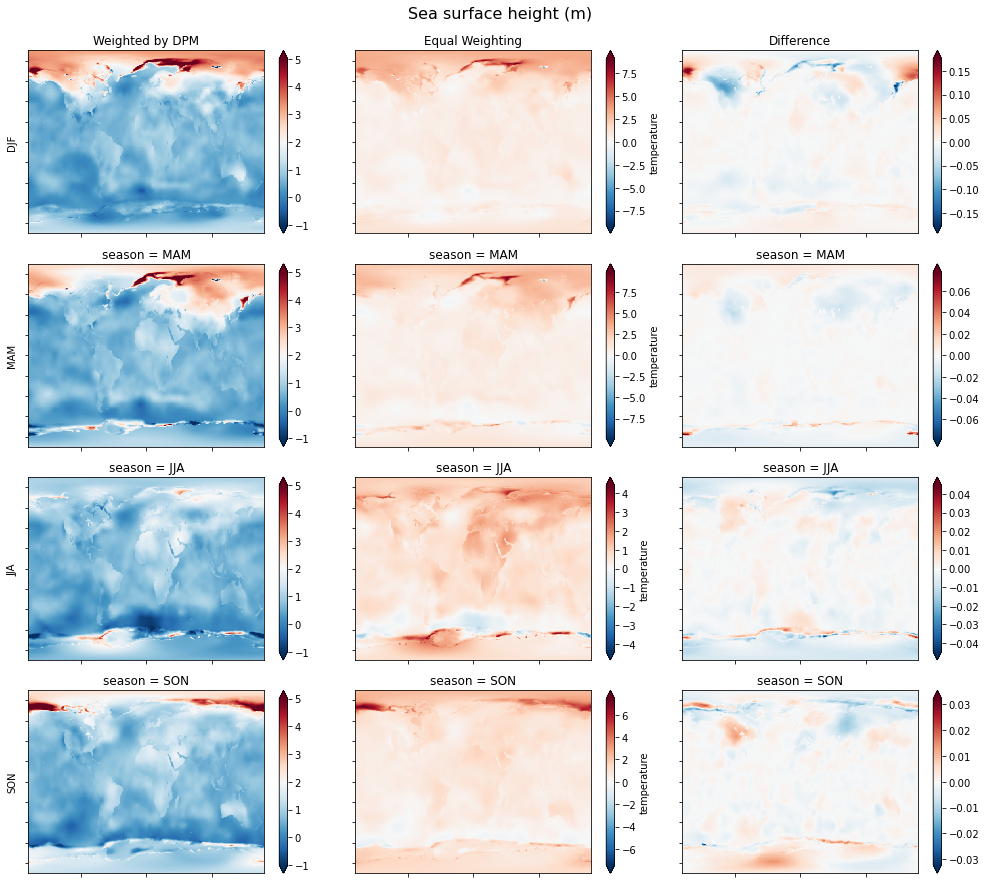

In [32]:
# Quick plot to show the results
notnull = pd.notnull(ds_unweighted[0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted.sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmax = 5,
        vmin=-1,
        cmap="RdBu_r",
        add_colorbar=True,
        extend="both",
    )

    ds_unweighted.sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        cmap="RdBu_r",
        add_colorbar=True,
        extend="both",
    )

    ds_diff.sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        cmap="RdBu_r",
        add_colorbar=True,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM")
axes[0, 1].set_title("Equal Weighting")
axes[0, 2].set_title("Difference")

plt.tight_layout()

fig.suptitle("Sea surface height (m)", fontsize=16, y=1.02)

In [43]:
fig.savefig('seasonal_ssh.png')